In [127]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [93]:
def draw_corners(x,y,img):
    #x,y = coord[:,0],coord[:,1]
    l = len(x)
    for i in range(l):
        img[x[i],y[i],:] = [0,0,255]
    return img

In [109]:
def draw_boxes(x,y,img,num_boxes):
    #x,y = coord[:,0],coord[:,1]
    for i in range(num_boxes):
        for j in range(3):
            img = cv.line(img,(x[i+j],y[i+j]),(x[i+1+j],y[i+j+1]), (0, 255, 0), 5)
        img = cv.line(img,(x[i+j+1],y[i+j+1]),(x[i],y[i]), (0, 255, 0), 5)
    return img

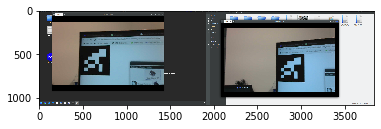

In [120]:
frame = cv.imread("multiple_markers.png",1)
#frame = cv.imread("marker_imgs/my_photo-1.jpg",1)
#frame = cv.imread("aruco_photo.png",1)
plt.imshow(frame)
plt.show()

In [121]:
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_250)
parameters =  cv.aruco.DetectorParameters_create() 
# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv.aruco.detectMarkers(frame, dictionary, parameters=parameters)
#len(rejectedCandidates)
num_markers = len(markerCorners)
print("Number of markers visible are:",num_markers)

Number of markers visible are: 2


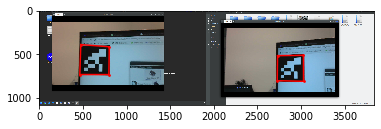

In [129]:
c = markerCorners
x,y = [],[]
for i in range(num_markers):
    x = x+list((c[i][0][:,0]))
    y = y+list((c[i][0][:,1]))
l = len(x)
for i in range(l):
    x[i] = int(x[i])
    y[i] = int(y[i])
plt.imshow(frame)
plt.scatter(x,y,s=3,c='red')
for i in  range(num_markers):
    plt.plot(x[i*4:i*4+4],y[i*4:i*4+4],color='r')
    plt.plot([x[i*4],x[i*4+3]],[y[i*4],y[i*4+3]],color='r')
plt.show()